In [ ]:
!pip install qiskit
!pip install numpy
!pip install matplotplib
!pip install pylatexenc
# Si tirar error de que no estan instaladas las librerias, descomentar las lineas de arriba 'pip install ...'

from qiskit import QuantumCircuit, execute
import numpy as np
from qiskit.extensions import UnitaryGate
from qiskit.visualization import plot_histogram
from qiskit import Aer

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
ERROR: Could not find a version that satisfies the requirement matplotplib (from versions: none)
ERROR: No matching distribution found for matplotplib
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


## Paso 1
### Preparar el estado


In [ ]:
def inicializar(circuito, qubits):
    """Aplicamos Hadamard a los qubits"""
    for q in qubits:
        circuito.h(q)
    return circuito

In [ ]:
cantidad_qubits = 4
mi_circuito = QuantumCircuit(cantidad_qubits)
respuesta = [5]

mi_circuito = inicializar(mi_circuito, [0,1,2])
mi_circuito.barrier(0, 1, 2)
mi_circuito.barrier(0, 1, 2)
mi_circuito.draw()

┌───┐ ░  ░ 
q_0: ┤ H ├─░──░─
     ├───┤ ░  ░ 
q_1: ┤ H ├─░──░─
     ├───┤ ░  ░ 
q_2: ┤ H ├─░──░─
     └───┘ ░  ░ 
q_3: ───────────

### Paso 2
El oraculo

Implementación 1

In [ ]:
def oraculo(i, respuesta):
    if i in respuesta:
        return 1
    else:
        return 0
matriz = np.diag((-1) * np.ones(2**cantidad_qubits))
print("Matriz antes de aplicar oraculo")
print(matriz)
for i in range(matriz.shape[0]):
    matriz[i, i] = matriz[i, i] ** oraculo(i, respuesta)
print("\nMatriz después de aplicar el oráculo")
print(matriz)
matriz_oraculo = UnitaryGate(matriz, label="Oráculo")

Matriz antes de aplicar oraculo
[[-1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0. -1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0. -1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0. -1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0. -1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0. -1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0. -1.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0. -1.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0. -1.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0. -1.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0. -1.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0. -1.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0. -1.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0. -1.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0. 

Implementación 2

In [ ]:
def compuerta_oraculo(respuesta):
    oraculo = QuantumCircuit(3)

    if  0 in respuesta:
        oraculo.x(0)
        oraculo.x(1)
        oraculo.x(2)

        oraculo.h(2)
        oraculo.ccx(0, 1, 2)
        oraculo.h(2)

        oraculo.x(2)
        oraculo.x(1)
        oraculo.x(0)

    elif 1 in respuesta:
        oraculo.x(1)
        oraculo.x(2)

        oraculo.h(2)
        oraculo.ccx(0, 1, 2)
        oraculo.h(2)

        oraculo.x(2)
        oraculo.x(1)

    elif 2 in respuesta:
        oraculo.x(0)
        oraculo.x(2)

        oraculo.h(2)
        oraculo.ccx(0, 1, 2)
        oraculo.h(2)

        oraculo.x(2)
        oraculo.x(0)

    elif 3 in respuesta:
        oraculo.x(0)

        oraculo.h(2)
        oraculo.ccx(0, 1, 2)
        oraculo.h(2)

        oraculo.x(2)


    elif 4 in respuesta:
        oraculo.x(0)
        oraculo.x(1)

        oraculo.h(2)
        oraculo.ccx(0, 1, 2)
        oraculo.h(2)

        oraculo.x(1)
        oraculo.x(0)

    elif 5 in respuesta:
        oraculo.x(1)

        oraculo.h(2)
        oraculo.ccx(0, 1, 2)
        oraculo.h(2)

        oraculo.x(1)

    elif 6 in respuesta:
        oraculo.x(0)

        oraculo.h(2)
        oraculo.ccx(0, 1, 2)
        oraculo.h(2)

        oraculo.x(0)


    elif 7 in respuesta:
        oraculo.h(2)
        oraculo.ccx(0, 1, 2)
        oraculo.h(2)


    compuerta_oraculo = oraculo.to_gate()
    compuerta_oraculo.name = "Oráculo"
    return compuerta_oraculo

In [ ]:
def inversion_fase(i):
    if i == 0:
        return 0
    else:
        return 1

matriz = np.diag((-1) * np.ones(2**cantidad_qubits))
print("Matriz antes de aplicar inversión de fase")
print(matriz)
for i in range(matriz.shape[0]):
    matriz[i, i] = matriz[i, i] ** inversion_fase(i)
print("\nMatriz después de aplicar inversión de fase")
print(matriz)
matriz_difusora = UnitaryGate(matriz, label="Difusora")

Matriz antes de aplicar inversión de fase
[[-1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0. -1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0. -1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0. -1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0. -1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0. -1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0. -1.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0. -1.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0. -1.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0. -1.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0. -1.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0. -1.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0. -1.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0. -1.  0.  0.]
 [ 0.  0.  0.  0.  0

# Paso 3
El difusor

Implementación 1

Implementación 2

In [ ]:
def difusor():
    qc = QuantumCircuit(3)
    # aplicar H
    for qubit in range(3):
        qc.h(qubit)
    # aplicar X
    for qubit in range(3):
        qc.x(qubit)

    qc.h(2)
    qc.toffoli(0, 1, 2)
    qc.h(2)

    for qubit in range(3):
        qc.x(qubit)

    for qubit in range(3):
        qc.h(qubit)

    qc.draw()
    U_s = qc.to_gate()
    U_s.mame = "Inv Fase"
    return U_s


Numero óptimo iteraciones:  3
Implementacion elegida:  1


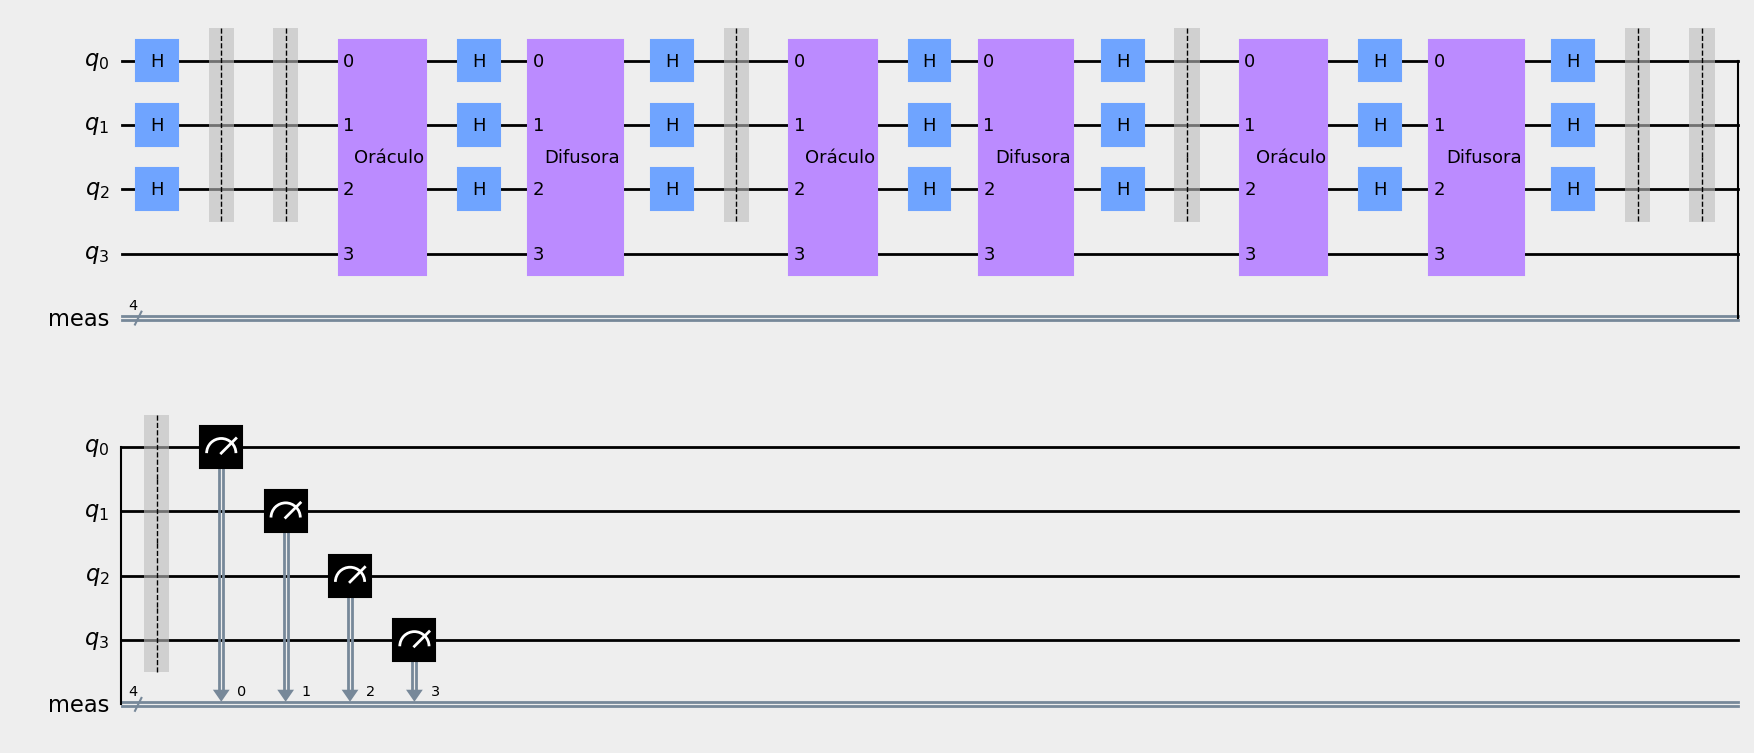

In [ ]:
i = 0
implementacion_elegida = 1    # 1 o 2
numero_optimo_iteraciones = int((np.pi / 4) * (cantidad_qubits/len(respuesta)**(1/2) ))
print("Numero óptimo iteraciones: ", numero_optimo_iteraciones)
print("Implementacion elegida: ", implementacion_elegida)
while i < numero_optimo_iteraciones:

   if implementacion_elegida == 1:
      mi_circuito.append(matriz_oraculo, [0, 1, 2, 3])
      mi_circuito.h([0, 1, 2])
      mi_circuito.append(matriz_difusora, [0, 1, 2, 3])
      mi_circuito.h([0, 1, 2])

   else:
      oraculo_gate = compuerta_oraculo(respuesta)
      mi_circuito.append(oraculo_gate, [0, 1, 2])
      mi_circuito.append(difusor(), [0, 1, 2])

   mi_circuito.barrier(0, 1, 2)
   i = i + 1

mi_circuito.barrier(0, 1, 2)
mi_circuito.measure_all()
mi_circuito.draw(output='mpl', style={'backgroundcolor': '#EEEEEE'})

# Experimento

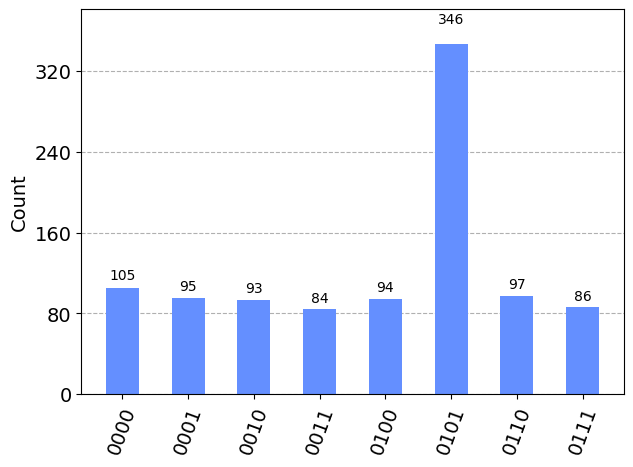

In [ ]:
simulacion_qasm = Aer.get_backend('qasm_simulator')
resultado = execute(mi_circuito, backend=simulacion_qasm, shots=1000).result()
counts = resultado.get_counts()
plot_histogram(counts)

# Links

https://qiskit.org/documentation/tutorials/circuits/3_summary_of_quantum_operations.html

https://qiskit.org/documentation/tutorials/algorithms/07_grover_examples.html

https://learn.qiskit.org/course/ch-algorithms/grovers-algorithm

https://qiskit.org/documentation/tutorials/algorithms/06_grover.html

https://towardsdatascience.com/behind-oracles-grovers-algorithm-amplitude-amplification-46b928b46f1e

https://quantum.country/search